# Implementation on partial dataset

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset
df = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned_top_5.csv')

# Create a graph representation
G = nx.Graph()

for index, row in df.iterrows():
    G.add_node(row['product_name'])
    
    # Add edges based on "customers_who_bought_this_item_also_bought"
    also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
    for item in also_bought:
        G.add_edge(row['product_name'], item)
        
    # Add edges based on "items_customers_buy_after_viewing_this_item"
    buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')
    for item in buy_after_viewing:
        G.add_edge(row['product_name'], item)

# Compute PageRank
pagerank = nx.pagerank(G)
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Identify communities using community detection
communities = list(nx.algorithms.community.label_propagation.asyn_lpa_communities(G))

# Create a dictionary to store product recommendations
recommendations = defaultdict(list)

# Recommend products based on PageRank and community detection
for i, (product, rank) in enumerate(pagerank_sorted):
    if i < 5:  # Recommend top 5 products based on PageRank
        recommendations[product].append(('PageRank', product))
        
    for community in communities:
        if product in community:
            for other_product in community:
                if other_product != product:
                    recommendations[product].append(('Community', other_product))
                    
# Print recommendations
for product, recommendations_list in recommendations.items():
    print(f"Recommendations for {product}:")
    for recommendation_type, recommended_product in recommendations_list:
        print(f"- {recommendation_type}: {recommended_product}")
    print()


Recommendations for Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model:
- PageRank: Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model
- Community: Hornby-R3064-RailRoad-Smokey-Locomotive 
- Community: Hornby-R6371-RailRoad-Petrol-Tanker
- Community: Hornby-R076-00-Gauge-Footbridge 
- Community: Hornby-R6367-RailRoad-Gauge-Rolling
- Community: Hornby-R6368-RailRoad-Gauge-Brake
- Community: Hornby-R8222-Gauge-Track-Extension
- Community: Hornby-R2672-RailRoad-Caledonian 
- Community: Hornby-Railroad-Transatlanic 

Recommendations for Hornby 2014 Catalogue:
- PageRank: Hornby 2014 Catalogue
- Community: Hornby-Book-Scenic-Railway-Modelling
- Community: Hornby-R8150-Catalogue-2015
- Community: Hornby-Book-Model-Railways-Edition
- Community: Newcomers-Guide-Model-Railways-Step
- Community: Hornby-Gloucester 
- Community: Peco-60-Plans-Book
- Community: Airfix-5014429781902

Recommendations for FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017

## Visualisation

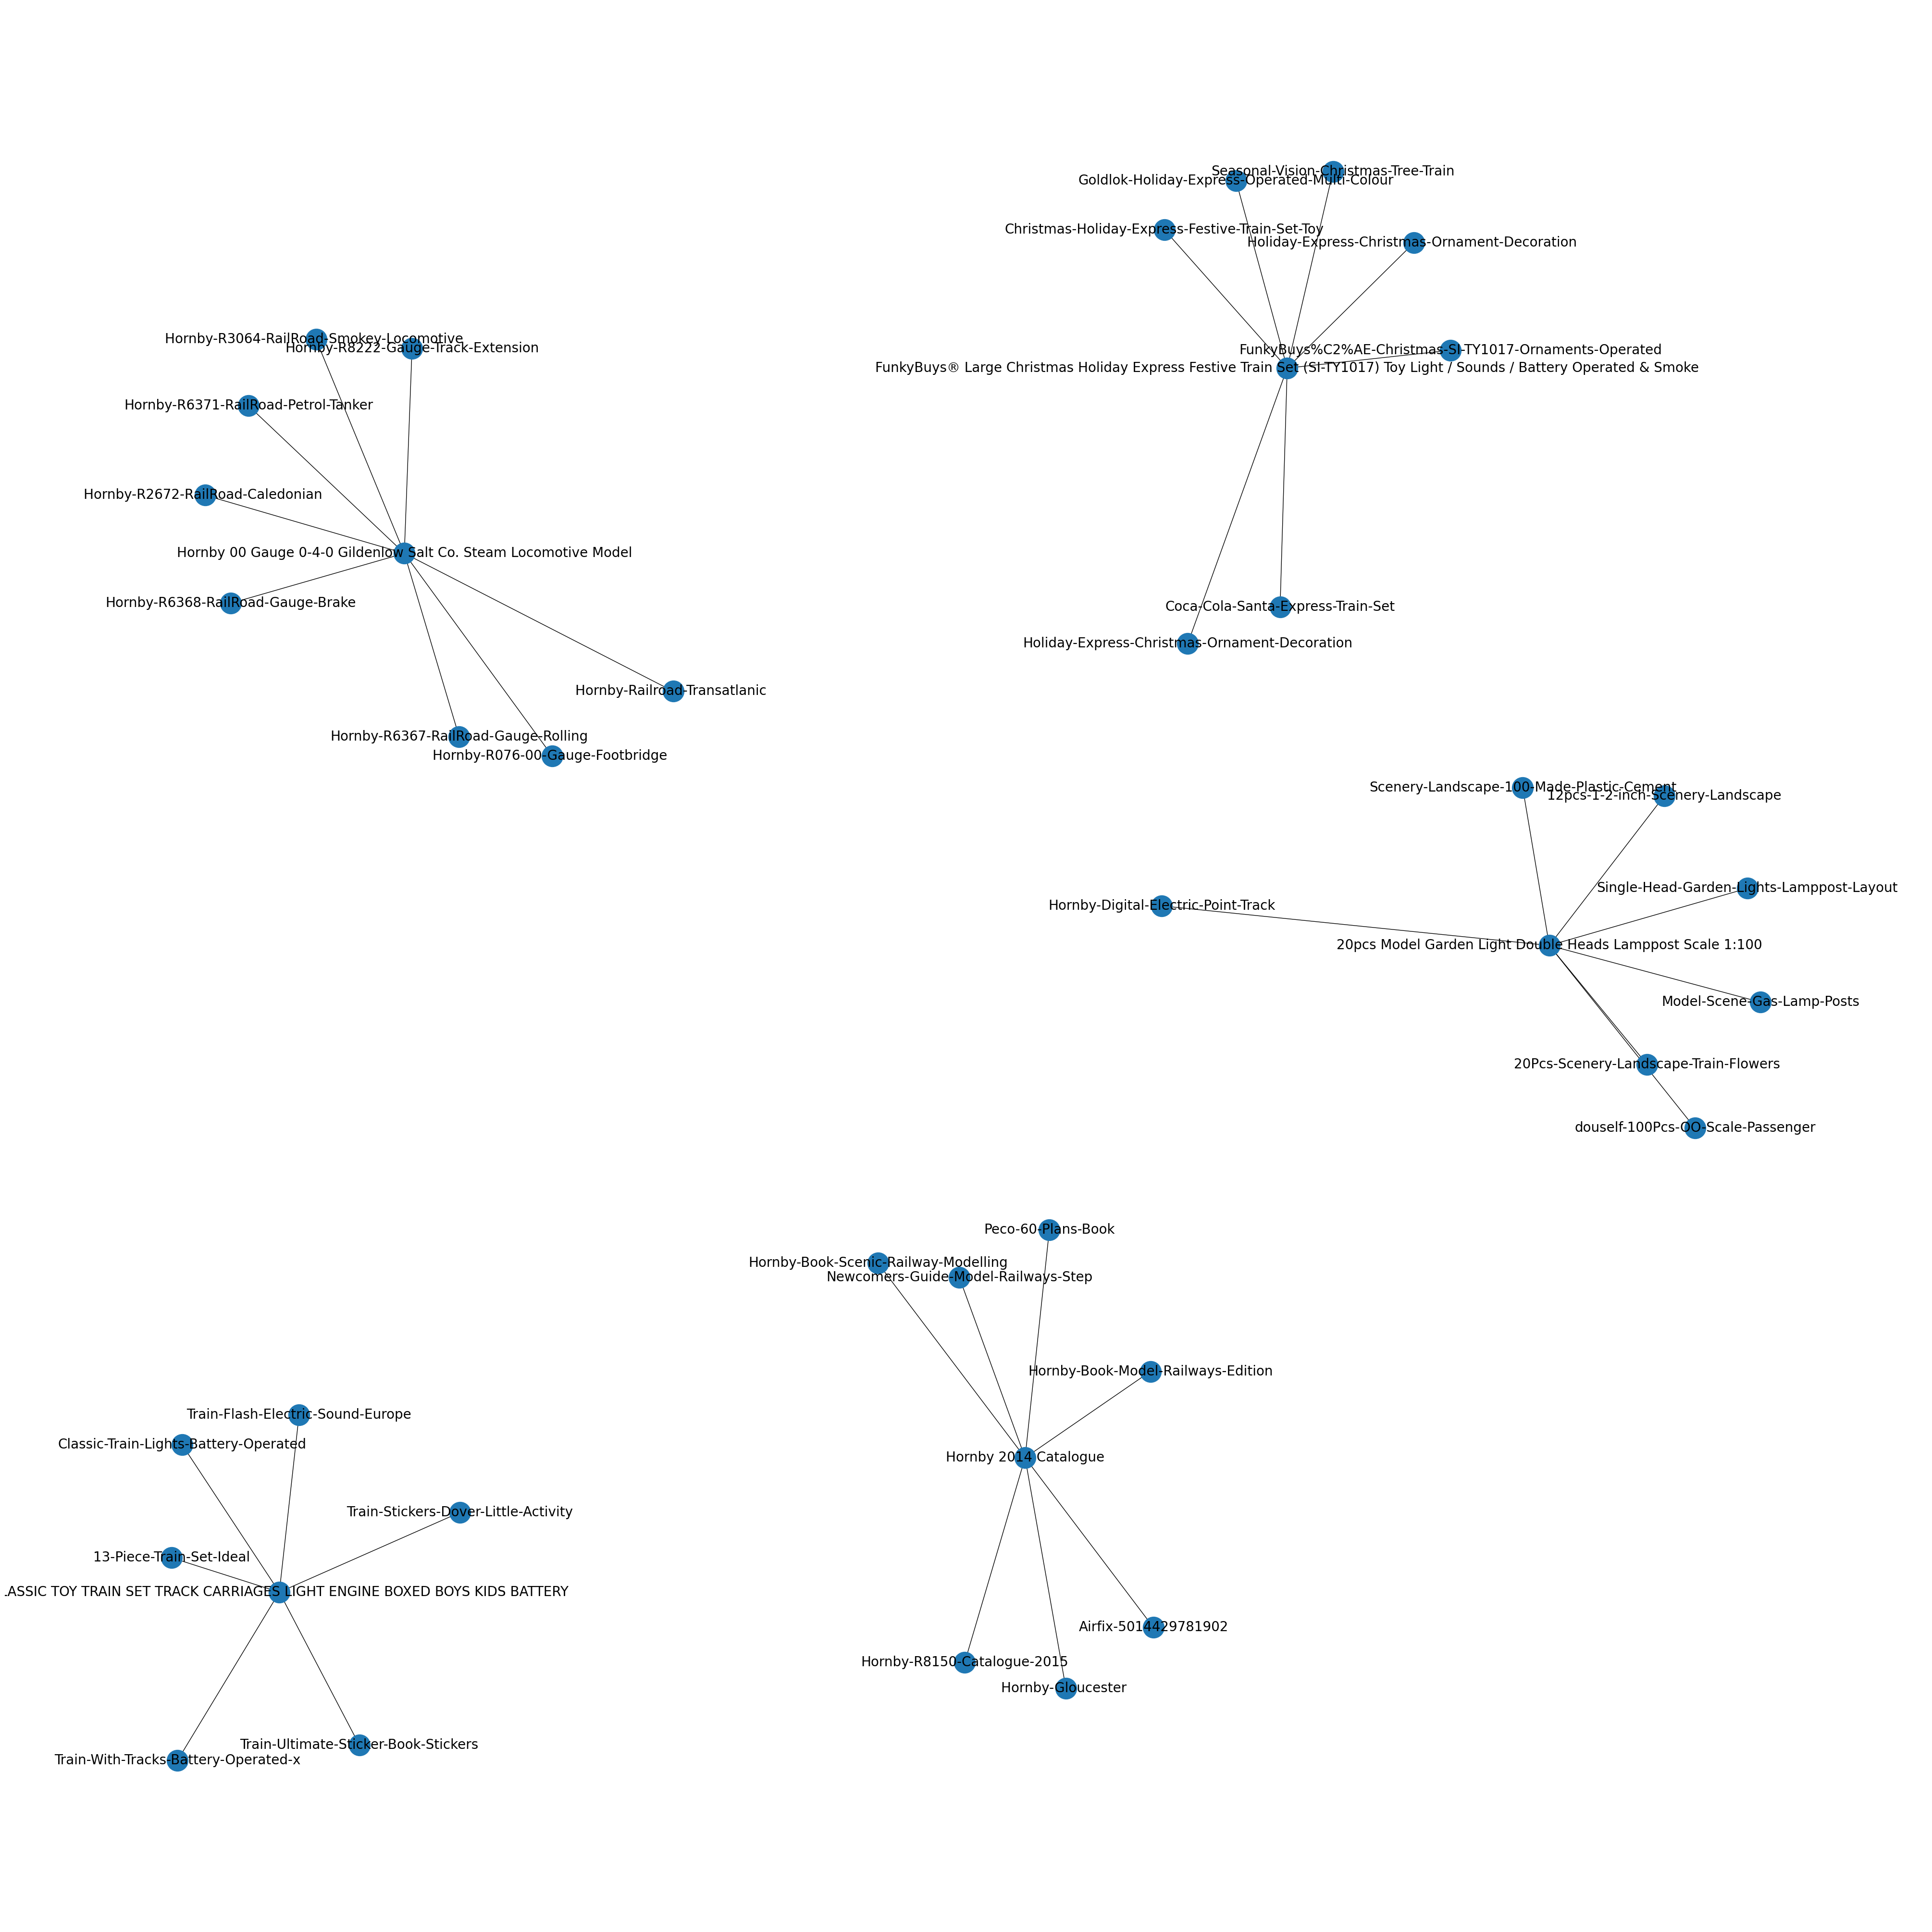

In [19]:
# visualize the graph with node labels
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, font_size=20, node_size=1000)
plt.show()

/home/manupande21/anaconda3/envs/universe/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


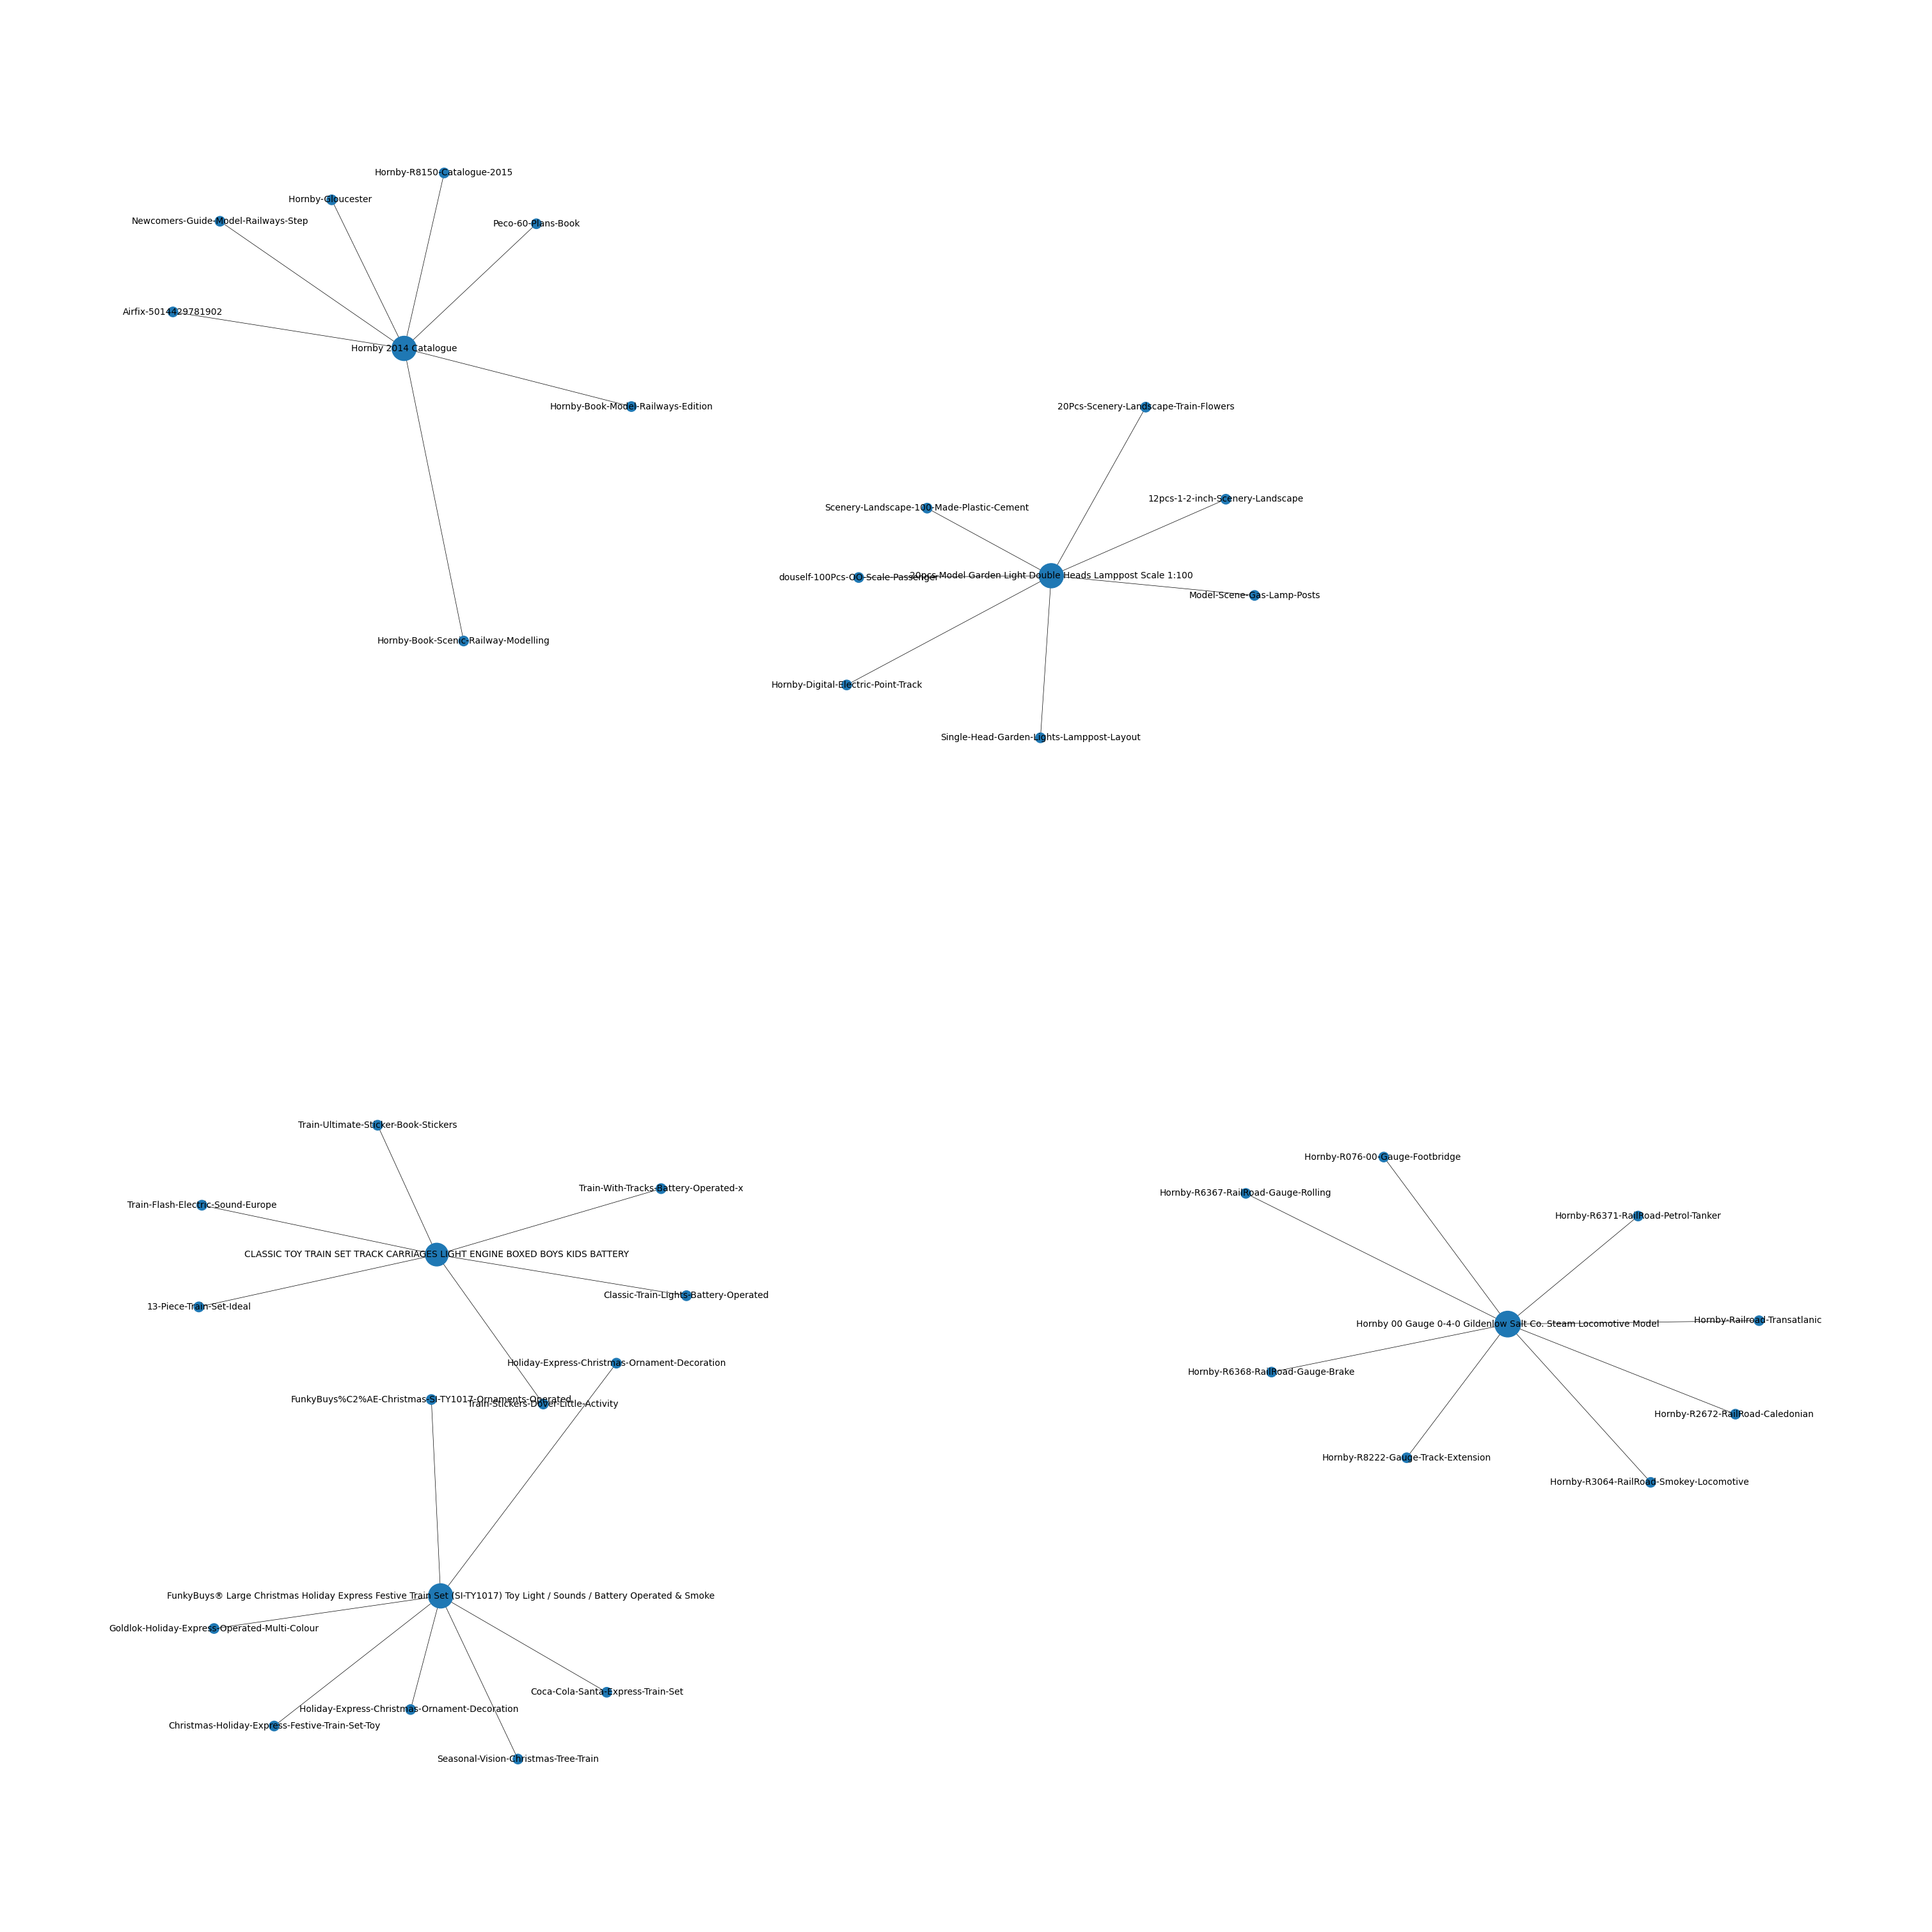

In [20]:

# visualize the graph with PageRank values
plt.figure(figsize=(30, 30))
node_size = [8000 * pagerank[node] for node in G]
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, node_size=node_size, width=0.5, cmap=plt.cm.viridis, with_labels=True, font_size=10)
plt.show()

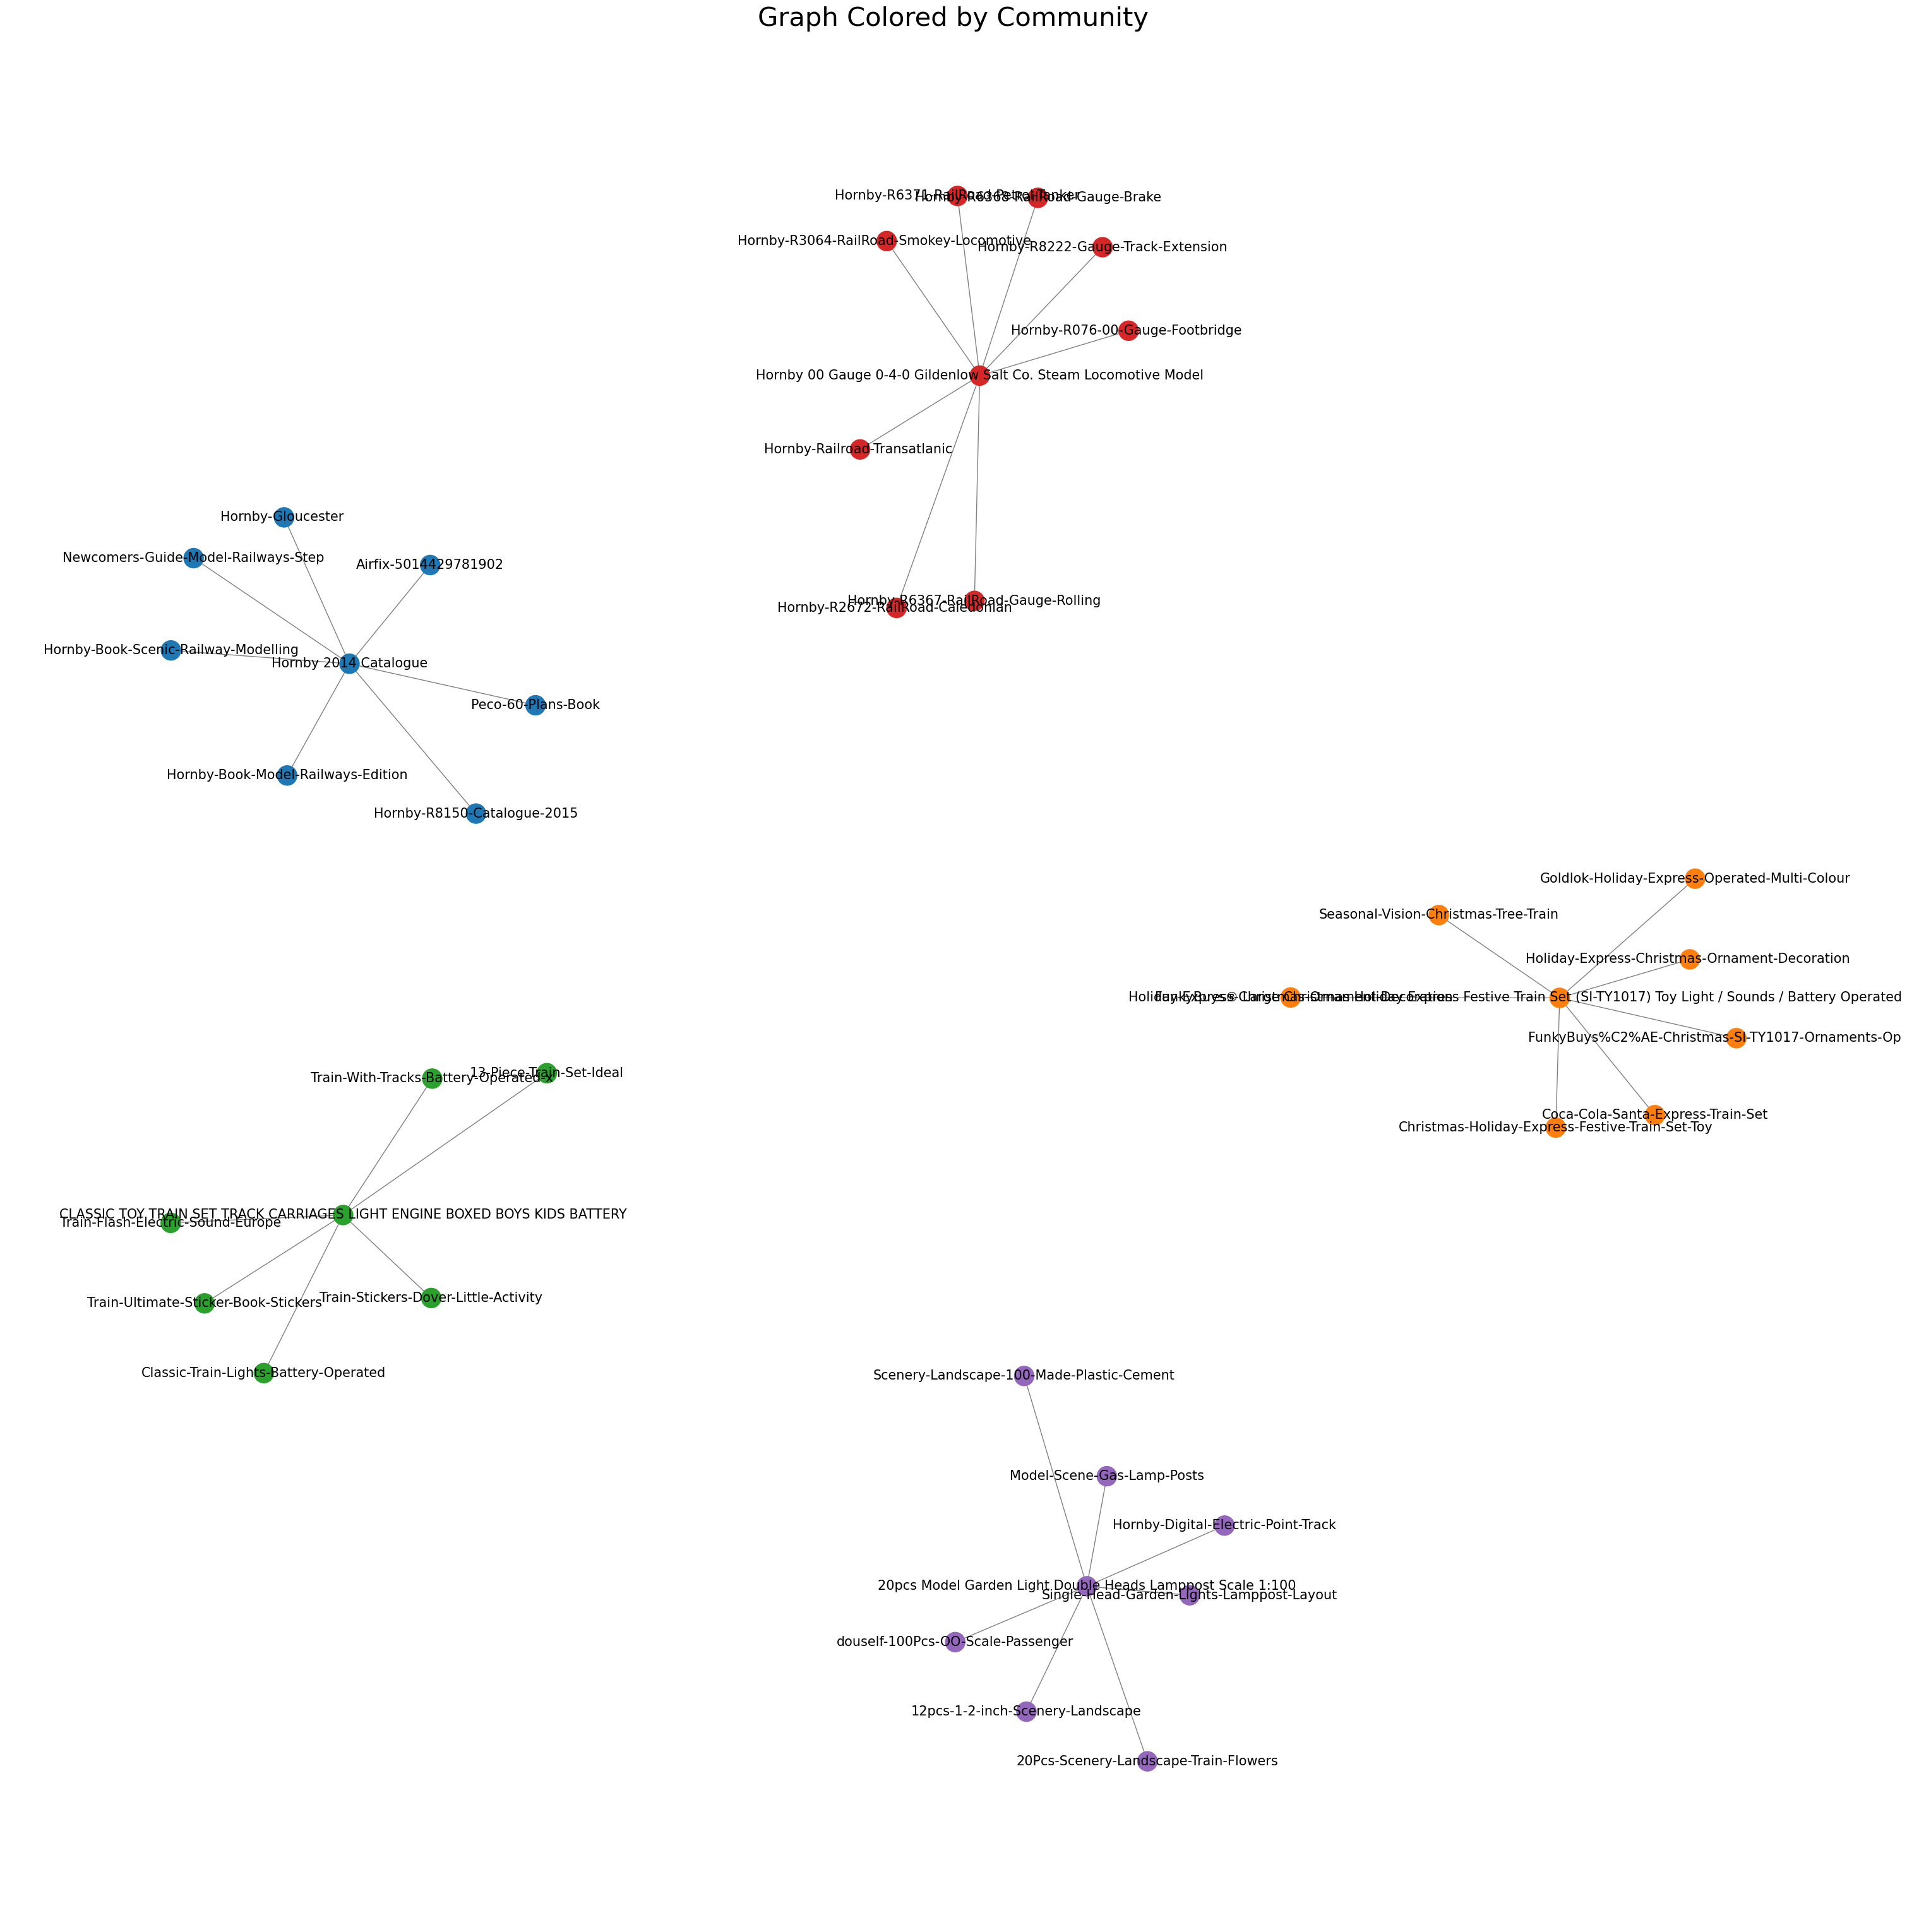

In [21]:

# Visualize the graph colored by community
node_colors = [f'C{i}' for i, community in enumerate(communities) for _ in community]
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=15)
plt.title('Graph Colored by Community', fontsize=30)
plt.show()

# Implementation on complete dataset

Creating ground truth data using the columns "customers_who_bought_this_item_also_bought" and "items_customers_buy_after_viewing_this_item"

In [22]:
from collections import defaultdict

def get_relevant_products(df_complete):
    """
    Extracts the list of relevant products for each product in the dataset.
    """
    relevant_products = defaultdict(set)

    for _, row in df_complete.iterrows():
        product = row['product_name']
        also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
        buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')

        relevant_products[product].update(also_bought)
        relevant_products[product].update(buy_after_viewing)

    return relevant_products

# Example usage
df_complete = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned.csv')
relevant_products = get_relevant_products(df_complete)

# Check the relevant products for a product
print(relevant_products['Hornby 2014 Catalogue'])

{'Hornby-Book-Scenic-Railway-Modelling', 'Hornby-R8150-Catalogue-2015', 'Hornby-Book-Model-Railways-Edition', 'Newcomers-Guide-Model-Railways-Step', 'Hornby-Gloucester ', 'Peco-60-Plans-Book', 'Airfix-5014429781902'}


In [23]:
recommendations

defaultdict(list,
            {'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model': [('PageRank',
               'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model'),
              ('Community', 'Hornby-R3064-RailRoad-Smokey-Locomotive '),
              ('Community', 'Hornby-R6371-RailRoad-Petrol-Tanker'),
              ('Community', 'Hornby-R076-00-Gauge-Footbridge '),
              ('Community', 'Hornby-R6367-RailRoad-Gauge-Rolling'),
              ('Community', 'Hornby-R6368-RailRoad-Gauge-Brake'),
              ('Community', 'Hornby-R8222-Gauge-Track-Extension'),
              ('Community', 'Hornby-R2672-RailRoad-Caledonian '),
              ('Community', 'Hornby-Railroad-Transatlanic ')],
             'Hornby 2014 Catalogue': [('PageRank', 'Hornby 2014 Catalogue'),
              ('Community', 'Hornby-Book-Scenic-Railway-Modelling'),
              ('Community', 'Hornby-R8150-Catalogue-2015'),
              ('Community', 'Hornby-Book-Model-Railways-Editio

Making the complete graph and the complete set of recommendations

In [24]:
# Create a graph representation
G1 = nx.Graph()

for index, row in df_complete.iterrows():
    G1.add_node(row['product_name'])
    
    # Add edges based on "customers_who_bought_this_item_also_bought"
    also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
    for item in also_bought:
        G1.add_edge(row['product_name'], item)
        
    # Add edges based on "items_customers_buy_after_viewing_this_item"
    buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')
    for item in buy_after_viewing:
        G1.add_edge(row['product_name'], item)

# Compute PageRank
pagerank_complete = nx.pagerank(G1)
pagerank_complete_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Identify communities using community detection
communities_complete = list(nx.algorithms.community.label_propagation.asyn_lpa_communities(G1))

# Create a dictionary to store product recommendations
recommendations_complete = defaultdict(list)

# Recommend products based on PageRank and community detection
for i, (product, rank) in enumerate(pagerank_complete_sorted):
    if i < 5:  # Recommend top 5 products based on PageRank
        recommendations_complete[product].append(product)
        
    for community in communities_complete:
        if product in community:
            for other_product in community:
                if other_product != product:
                    recommendations_complete[product].append(other_product)


In [25]:
pagerank_complete_sorted

[('Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model',
  0.10540748278287643),
 ('Hornby 2014 Catalogue', 0.0939206995281798),
 ('FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke',
  0.0939206995281798),
 ('20pcs Model Garden Light Double Heads Lamppost Scale 1:100',
  0.0939206995281798),
 ('CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY',
  0.08243391627348319),
 ('Classic-Train-Lights-Battery-Operated', 0.015427680621086137),
 ('Train-With-Tracks-Battery-Operated-x', 0.015427680621086137),
 ('13-Piece-Train-Set-Ideal', 0.015427680621086137),
 ('Train-Flash-Electric-Sound-Europe', 0.015427680621086137),
 ('Train-Ultimate-Sticker-Book-Stickers', 0.015427680621086137),
 ('Train-Stickers-Dover-Little-Activity', 0.015427680621086137),
 ('Hornby-R8150-Catalogue-2015', 0.0151541857816886),
 ('Hornby-Book-Model-Railways-Edition', 0.0151541857816886),
 ('Hornby-Book-Scenic-Railway-

In [26]:
recommendations_complete

defaultdict(list,
            {'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model': ['Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model',
              "Hornby R3086 RailRoad LNER 4-6-2 'Flying Scotsman' Class A3 00 Gauge Steam Locomotive",
              'Hornby Railroad 00 Gauge LNER Class A4 Golden Shuttle Steam Locomotive',
              'Hornby-R8150-Catalogue-2015',
              'Hornby R3119 LMS Duchess Of Abercorn - No Smoke Deflectors 00 Gauge Steam Locomotive',
              'Peco-SL-14-Track-suitable-Gauge',
              'Peco-SL-310-Nickel-Joiners-Railway',
              'Hornby-R8224-Gauge-Track-Extension',
              "Hornby '00' Gauge R4526 RailRoad Night Mail Operating Mail - GWR Chocolate and Cream Coach",
              'Hornby-Pack-of-12-Fishplates ',
              'Hornby-Gauge-RailRoad-Wagon-Model',
              'Hornby-Railroad-Gauge-County-Locomotive ',
              "Hornby '00' Gauge R3169 RailRoad GWR 4-6-0 'Olton Hall' 4900 Hal

## Evaluation

In [27]:
from typing import Dict, List, Set
def precision_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the Precision@k for the given recommendations."""
    relevant_in_top_k = [product for product in recommended_products[:k] if product in relevant_products]
    return len(relevant_in_top_k) / k

In [28]:
def recall_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the Recall@k for the given recommendations."""
    relevant_in_top_k = [product for product in recommended_products[:k] if product in relevant_products]
    return len(relevant_in_top_k) / len(relevant_products)

In [29]:
def f1_score_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the F1-score@k for the given recommendations."""
    precision = precision_at_k(recommended_products, relevant_products, k)
    recall = recall_at_k(recommended_products, relevant_products, k)
    if precision == 0 or recall == 0:
        return 0.0
    else:
        return 2 * (precision * recall) / (precision + recall)

In [30]:
def ndcg_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the NDCG@k for the given recommendations."""
    dcg = 0
    idcg = 0
    
    for i, product in enumerate(recommended_products[:k]):
        if product in relevant_products:
            dcg += 1 / (i + 1)
    
    for i, product in enumerate(sorted(relevant_products, reverse=True)[:k]):
        idcg += 1 / (i + 1)
    
    return dcg / idcg

In [36]:
def evaluate_recommendations(recommendations_complete: Dict[str, List[str]],
                             relevant_products: Dict[str, Set[str]],
                             k: int = 10) -> Dict[str, float]:
    """
    Evaluates the recommendations made by the recommendation engine.
    
    Args:
        recommended_products (Dict[str, List[str]]): A dictionary mapping each product to a list of recommended products.
        relevant_products (Dict[str, Set[str]]): A dictionary mapping each product to a set of relevant products.
        k (int): The number of top recommendations to consider for the evaluation metrics.
        
    Returns:
        Dict[str, float]: A dictionary containing the evaluation metrics for the recommendation engine.
    """
    metrics = {
        'precision_at_k': 0.0,
        'recall_at_k': 0.0,
        'f1_score_at_k': 0.0,
        'ndcg_at_k': 0.0
    }
    num_products = 0

    for product, recommendations in recommendations_complete.items():
        relevant = relevant_products[product]
        if relevant:
            metrics['precision_at_k'] += precision_at_k(recommendations, relevant, k)
            metrics['recall_at_k'] += recall_at_k(recommendations, relevant, k)
            metrics['f1_score_at_k'] += f1_score_at_k(recommendations, relevant, k)
            metrics['ndcg_at_k'] += ndcg_at_k(recommendations, relevant, k)
            num_products += 1

    if num_products > 0:
        num_products = len(recommendations_complete)
        metrics['precision_at_k'] /= num_products
        metrics['recall_at_k'] /= num_products
        metrics['f1_score_at_k'] /= num_products
        metrics['ndcg_at_k'] /= num_products

    return metrics

In [37]:
for k in [1, 3, 5, 10, 15, 20]:
    metrics = evaluate_recommendations(recommendations_complete, relevant_products, k=k)
    print(f"Evaluation metrics at k = {k}:")
    print(f"Precision@{k}: {metrics['precision_at_k']:.4f}")
    print(f"Recall@{k}: {metrics['recall_at_k']:.4f}")
    print(f"F1-score@{k}: {metrics['f1_score_at_k']:.4f}")
    print(f"NDCG@{k}: {metrics['ndcg_at_k']:.4f}")
    print()

Evaluation metrics at k = 1:
Precision@1: 0.0000
Recall@1: 0.0000
F1-score@1: 0.0000
NDCG@1: 0.0000

Evaluation metrics at k = 3:
Precision@3: 0.0417
Recall@3: 0.0185
F1-score@3: 0.0256
NDCG@3: 0.0273

Evaluation metrics at k = 5:
Precision@5: 0.0500
Recall@5: 0.0369
F1-score@5: 0.0424
NDCG@5: 0.0350

Evaluation metrics at k = 10:
Precision@10: 0.0400
Recall@10: 0.0595
F1-score@10: 0.0478
NDCG@10: 0.0395

Evaluation metrics at k = 15:
Precision@15: 0.0267
Recall@15: 0.0595
F1-score@15: 0.0368
NDCG@15: 0.0395

Evaluation metrics at k = 20:
Precision@20: 0.0225
Recall@20: 0.0662
F1-score@20: 0.0336
NDCG@20: 0.0405

